In [ ]:
# !pip install tensorflow==1.15.0

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgbm
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import InputLayer, Input
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import TensorBoard
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import matplotlib as mpl

# evaluate lightgbm ensemble for regression
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from lightgbm import LGBMRegressor

In [ ]:
randomState = 42
np.random.seed(randomState)
tf.set_random_seed(randomState)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df5 = pd.read_csv('/content/gdrive/MyDrive/SoilMoisture/Data/c_5_data_soil_5.csv')
df10 = pd.read_csv('/content/gdrive/MyDrive/SoilMoisture/Data/c_5_data_soil_10.csv')
df20 = pd.read_csv('/content/gdrive/MyDrive/SoilMoisture/Data/c_5_data_soil_20.csv')
df50 = pd.read_csv('/content/gdrive/MyDrive/SoilMoisture/Data/c_5_data_soil_50.csv')
df100 = pd.read_csv('/content/gdrive/MyDrive/SoilMoisture/Data/c_5_data_soil_100.csv')

df5 = df5.rename(columns={'In-Situ':'InSitu'})
df10 = df10.rename(columns={'In-Situ':'InSitu'})
df20 = df20.rename(columns={'In-Situ':'InSitu'})
df50 = df50.rename(columns={'In-Situ':'InSitu'})
df100 = df100.rename(columns={'In-Situ':'InSitu'})

def replace_missing(attribute):
    return attribute.interpolate(inplace=True)

replace_missing(df5['NDVI'])
replace_missing(df5['EVI'])
replace_missing(df5['LSTDay'])
replace_missing(df5['LSTNight'])

replace_missing(df10['NDVI'])
replace_missing(df10['EVI'])
replace_missing(df10['LSTDay'])
replace_missing(df10['LSTNight'])

replace_missing(df20['NDVI'])
replace_missing(df20['EVI'])
replace_missing(df20['LSTDay'])
replace_missing(df20['LSTNight'])

replace_missing(df50['NDVI'])
replace_missing(df50['EVI'])
replace_missing(df50['LSTDay'])
replace_missing(df50['LSTNight'])

replace_missing(df100['NDVI'])
replace_missing(df100['EVI'])
replace_missing(df100['LSTDay'])
replace_missing(df100['LSTNight'])


df5 = df5.dropna()
df10 = df10.dropna()
df20 = df20.dropna()
df50 = df50.dropna()
df100 = df100.dropna()

In [ ]:
df5.pop("BD")
df10.pop("BD")
df20.pop("BD")
df50.pop("Precip")
df100.pop("BD")
df100.pop("Precip")

raw5 = df5.copy()
raw10 = df10.copy()
raw20 = df20.copy()
raw50 = df50.copy()
raw100 = df100.copy()

raw5.pop("InSitu")
raw10.pop("InSitu")
raw20.pop("InSitu")
raw50.pop("InSitu")
raw100.pop("InSitu")

2        0.20708
3        0.20679
4        0.20750
5        0.20929
6        0.20937
          ...   
42497    0.39700
42498    0.39700
42499    0.39700
42500    0.39700
42501    0.39711
Name: InSitu, Length: 42500, dtype: float64

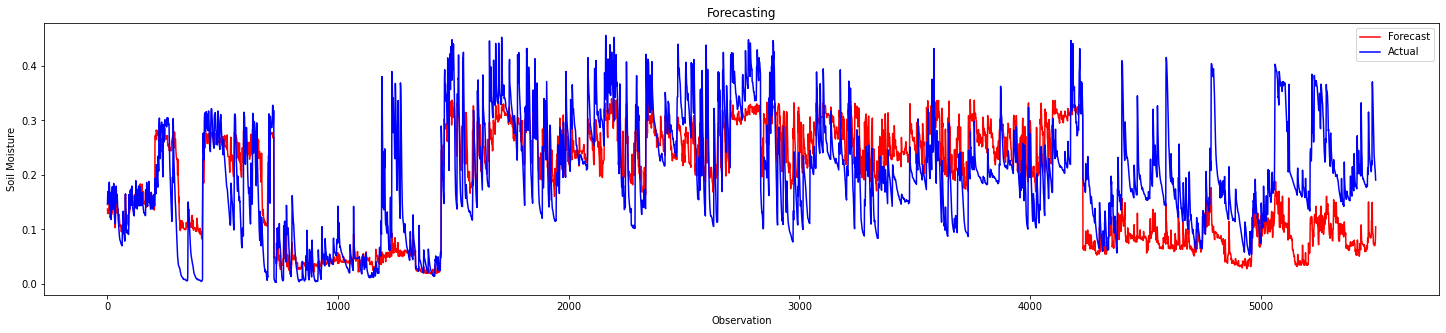

In [ ]:
# define dataset
train_size_5 = int(len(df5)*0.9)
train_dataset_5, test_dataset_5 = df5.iloc[:train_size_5], df5.iloc[train_size_5:]

X5_train = np.asarray(train_dataset_5.drop('InSitu', axis = 1))
y5_train = np.asarray(train_dataset_5.loc[:,['InSitu']])
y5_train.reshape(-1, 1)

X5_test = np.asarray(test_dataset_5.drop('InSitu', axis = 1))
y5_test = np.asarray(test_dataset_5.loc[:,['InSitu']])
y5_test.reshape(-1, 1)

# standard scaling
input_scaler_5 = StandardScaler().fit(X5_train)
X5_train = input_scaler_5.transform(X5_train)
X5_test = input_scaler_5.transform(X5_test)

# define the model
opt_params = {'colsample_bytree': 0.6051900543300555, 'learning_rate': 0.1, 'max_depth': 15, 'min_child_samples': 43, 'min_child_weight': 10.0, 'num_leaves': 10, 'reg_alpha': 5, 'reg_lambda': 3, 'subsample': 0.7799099313354487}
model = LGBMRegressor()
model.set_params(**opt_params)
model.fit(X5_train, y5_train.ravel())

# forecasting
y5_pred = model.predict(X5_test)

plt.figure(figsize=(25, 5))
plt.plot(y5_pred, 'r')
plt.plot(y5_test, 'b' )
plt.title('Forecasting')
plt.ylabel('Soil Moisture')
plt.xlabel('Observation')
plt.legend(['Forecast', 'Actual'], loc='upper right')
plt.savefig('/content/gdrive/MyDrive/SoilMoisture/Forecast/LGBM_c5_5.png', dpi=400)
plt.show()

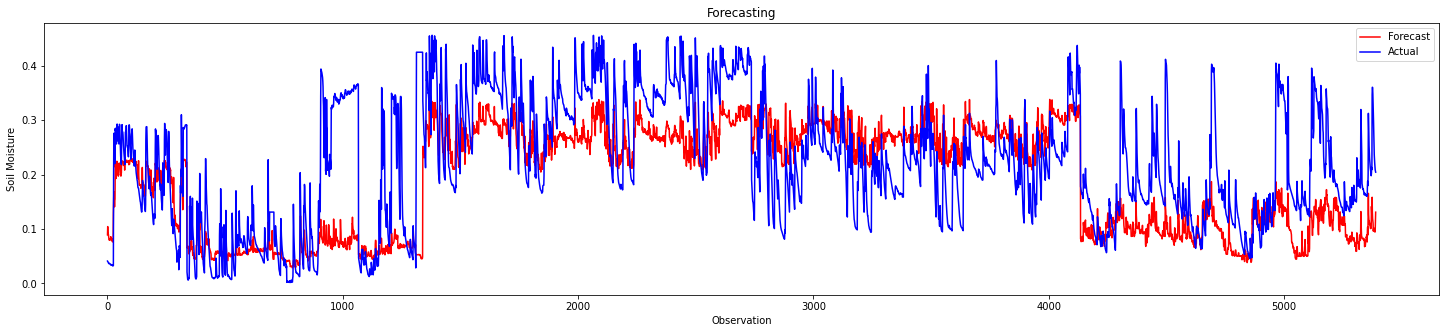

In [ ]:
# define dataset
train_size_10 = int(len(df10)*0.9)
train_dataset_10, test_dataset_10 = df10.iloc[:train_size_10], df10.iloc[train_size_10:]

X10_train = np.asarray(train_dataset_10.drop('InSitu', axis = 1))
y10_train = np.asarray(train_dataset_10.loc[:,['InSitu']])
y10_train.reshape(-1, 1)

X10_test = np.asarray(test_dataset_10.drop('InSitu', axis = 1))
y10_test = np.asarray(test_dataset_10.loc[:,['InSitu']])
y10_test.reshape(-1, 1)

# standard scaling
input_scaler_10 = StandardScaler().fit(X10_train)
X10_train = input_scaler_10.transform(X10_train)
X10_test = input_scaler_10.transform(X10_test)

# define the model
opt_params = {'colsample_bytree': 0.6051900543300555, 'learning_rate': 0.1, 'max_depth': 15, 'min_child_samples': 43, 'min_child_weight': 10.0, 'num_leaves': 10, 'reg_alpha': 5, 'reg_lambda': 3, 'subsample': 0.7799099313354487}
model = LGBMRegressor()
model.set_params(**opt_params)
model.fit(X10_train, y10_train.ravel())

# forecasting
y10_pred = model.predict(X10_test)

plt.figure(figsize=(25, 5))
plt.plot(y10_pred, 'r')
plt.plot(y10_test, 'b' )
plt.title('Forecasting')
plt.ylabel('Soil Moisture')
plt.xlabel('Observation')
plt.legend(['Forecast', 'Actual'], loc='upper right')
plt.savefig('/content/gdrive/MyDrive/SoilMoisture/Forecast/LGBM_c5_10.png', dpi=400)
plt.show()

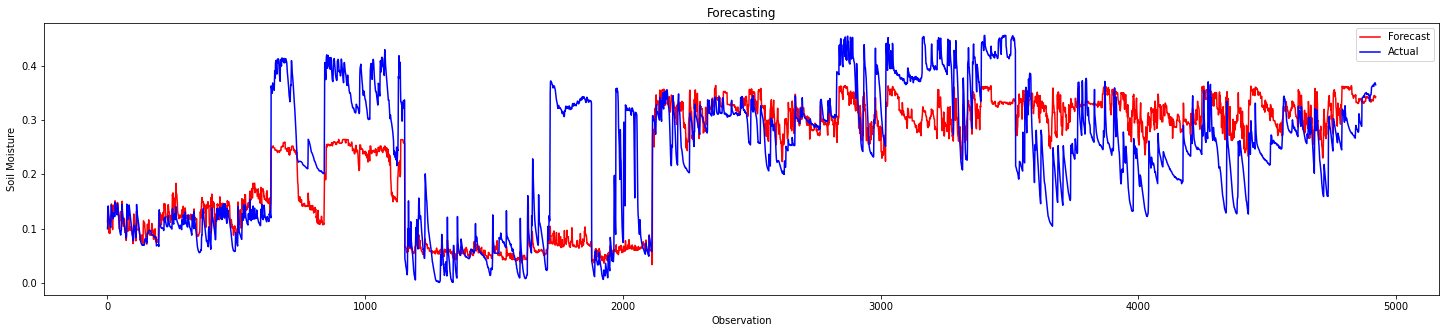

In [ ]:
# define dataset
train_size_20 = int(len(df20)*0.9)
train_dataset_20, test_dataset_20 = df20.iloc[:train_size_20], df20.iloc[train_size_20:]

X20_train = np.asarray(train_dataset_20.drop('InSitu', axis = 1))
y20_train = np.asarray(train_dataset_20.loc[:,['InSitu']])
y20_train.reshape(-1, 1)

X20_test = np.asarray(test_dataset_20.drop('InSitu', axis = 1))
y20_test = np.asarray(test_dataset_20.loc[:,['InSitu']])
y20_test.reshape(-1, 1)

# standard scaling
input_scaler_20 = StandardScaler().fit(X20_train)
X20_train = input_scaler_20.transform(X20_train)
X20_test = input_scaler_20.transform(X20_test)

# define the model
opt_params = {'colsample_bytree': 0.796013298339504, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 349, 'min_child_weight': 100.0, 'num_leaves': 13, 'reg_alpha': 10, 'reg_lambda': 25, 'subsample': 0.302421687583401}
model = LGBMRegressor()
model.set_params(**opt_params)
model.fit(X20_train, y20_train.ravel())

# forecasting
y20_pred = model.predict(X20_test)

plt.figure(figsize=(25, 5))
plt.plot(y20_pred, 'r')
plt.plot(y20_test, 'b' )
plt.title('Forecasting')
plt.ylabel('Soil Moisture')
plt.xlabel('Observation')
plt.legend(['Forecast', 'Actual'], loc='upper right')
plt.savefig('/content/gdrive/MyDrive/SoilMoisture/Forecast/LGBM_c5_20.png', dpi=400)
plt.show()

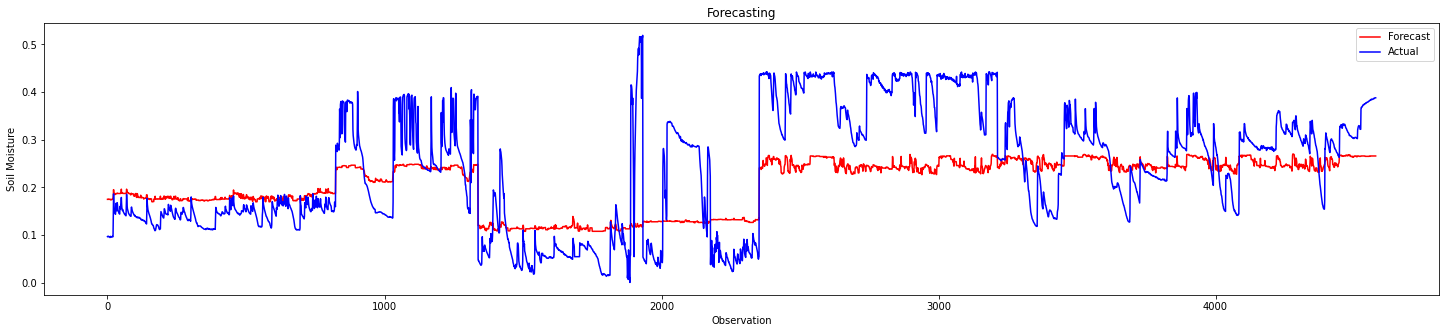

In [ ]:
# define dataset
train_size_50 = int(len(df50)*0.9)
train_dataset_50, test_dataset_50 = df50.iloc[:train_size_50], df50.iloc[train_size_50:]

X50_train = np.asarray(train_dataset_50.drop('InSitu', axis = 1))
y50_train = np.asarray(train_dataset_50.loc[:,['InSitu']])
y50_train.reshape(-1, 1)

X50_test = np.asarray(test_dataset_50.drop('InSitu', axis = 1))
y50_test = np.asarray(test_dataset_50.loc[:,['InSitu']])
y50_test.reshape(-1, 1)

# standard scaling
input_scaler_50 = StandardScaler().fit(X50_train)
X50_train = input_scaler_50.transform(X50_train)
X50_test = input_scaler_50.transform(X50_test)

# define the model
opt_params = {'colsample_bytree': 0.44945060352437893, 'learning_rate': 0.01, 'max_depth': 30, 'min_child_samples': 119, 'min_child_weight': 100.0, 'num_leaves': 33, 'reg_alpha': 0.01, 'reg_lambda': 10, 'subsample': 0.6284334424128668}
model = LGBMRegressor()
model.set_params(**opt_params)
model.fit(X50_train, y50_train.ravel())

# forecasting
y50_pred = model.predict(X50_test)

plt.figure(figsize=(25, 5))
plt.plot(y50_pred, 'r')
plt.plot(y50_test, 'b' )
plt.title('Forecasting')
plt.ylabel('Soil Moisture')
plt.xlabel('Observation')
plt.legend(['Forecast', 'Actual'], loc='upper right')
plt.savefig('/content/gdrive/MyDrive/SoilMoisture/Forecast/LGBM_c5_50.png', dpi=400)
plt.show()

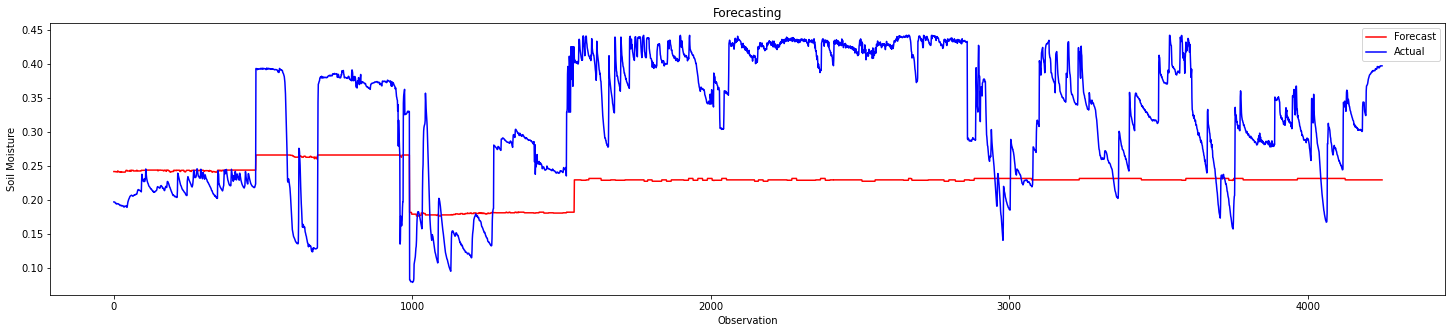

In [ ]:
# define dataset
train_size_100 = int(len(df100)*0.9)
train_dataset_100, test_dataset_100 = df100.iloc[:train_size_100], df100.iloc[train_size_100:]

X100_train = np.asarray(train_dataset_100.drop('InSitu', axis = 1))
y100_train = np.asarray(train_dataset_100.loc[:,['InSitu']])
y100_train.reshape(-1, 1)

X100_test = np.asarray(test_dataset_100.drop('InSitu', axis = 1))
y100_test = np.asarray(test_dataset_100.loc[:,['InSitu']])
y100_test.reshape(-1, 1)

# standard scaling
input_scaler_100 = StandardScaler().fit(X100_train)
X100_train = input_scaler_100.transform(X100_train)
X100_test = input_scaler_100.transform(X100_test)

# define the model
opt_params = {'colsample_bytree': 0.6316033217250339, 'learning_rate': 0.005, 'max_depth': 25, 'min_child_samples': 64, 'min_child_weight': 100.0, 'num_leaves': 8, 'reg_alpha': 5, 'reg_lambda': 3, 'subsample': 0.7093362205925597}
model = LGBMRegressor()
model.set_params(**opt_params)
model.fit(X100_train, y100_train.ravel())

# forecasting
y100_pred = model.predict(X100_test)

plt.figure(figsize=(25, 5))
plt.plot(y100_pred, 'r')
plt.plot(y100_test, 'b' )
plt.title('Forecasting')
plt.ylabel('Soil Moisture')
plt.xlabel('Observation')
plt.legend(['Forecast', 'Actual'], loc='upper right')
plt.savefig('/content/gdrive/MyDrive/SoilMoisture/Forecast/LGBM_c5_100.png', dpi=400)
plt.show()